In [21]:
# settings
keyword='all_255_cells_V4'
baseDir="/data/jinwf/wangjl/apa/190705PAS/bed/freq2/"

In [61]:
# Not used, this fn
#step1 make annovar input file
# v1  input chr10	3178850	3178992	chr10:3178992:+	126	+
def get1()
    import re,time
    baseDir="/home/wangjl/data/apa/190610APA/bed/M/bed/pas_bed/"
    fr=open(baseDir+"all.gt5.freq","r");
    fw=open(baseDir+"all.gt5.avinput","w");
    #
    i=0;
    for lineR in fr.readlines():
        i+=1;
        line=lineR.strip()
        arr=re.split("\t",line) #chr10	3178850	3178992	chr10:3178992:+	126	+
        if arr[-1]=="+":
            pos=arr[2]
        else:
            pos=arr[1]
        #1       948921  948921  T       C       comments: rs15842, a SNP in 5' UTR of ISG15
        arr2=[ arr[0], pos, pos, "T",'G', arr[3] ]
        fw.write( '\t'.join(arr2) + "\n");

    fr.close();
    fw.close();

    print('==End==');
    time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())

==End==


'2019-07-17 01:05:42'

In [22]:
#step1 make annovar input file 
# version 2  input file is pas site col:  chr10:174098:-
# version 2.1 bed to avinput, if add 1 to pos?
import re,time
def get2():
    fr=open(baseDir+"all225_pasV4_150626.txt","r");
    fw=open(baseDir+"/anno/all225_pas.avinput","w");
    #
    i=0;
    for lineR in fr.readlines():
        i+=1;
        line=lineR.strip()
        arr=re.split(":",line) #chr10:174098:-
        arr[1]=str( int(arr[1])+1 )
        #1       948921  948921  T       C       comments: rs15842, a SNP in 5' UTR of ISG15
        arr2=[ arr[0], arr[1], arr[1], "T",'G', arr[2] ]
        fw.write( '\t'.join(arr2) + "\n");
    fr.close();
    fw.close();

    print('==End==, i=',i);
    time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
    #chr10	174098	174098	T	G	-
get2();

==End==, i= 150626


In [35]:
# using annovar
$ annotate_variation.pl -geneanno -dbtype refGene -buildver hg19 all.gt5.avinput /home/wangjl/data/software/annovar/humandb19/ -out all.gt5.anno_
$ head all.gt5.anno_.variant_function

$ awk '{print $1}' all.gt5.anno_.variant_function |sort |uniq -c |sort -k 1nr > anno.stat
#py plot pieplot

#
$ awk '{print $2}' all.gt5.anno_.variant_function |awk -F"(" '{print $1}' |sort |uniq -c |sort -k 1nr > pas.per.gene
$ awk '{print $1}' pas.per.gene |sort|uniq -c |sort -k 1nr >pas.per.gene.freq
#R barplot

127 /bin/sh: annotate_variation.pl: command not found


# pie plot

In [23]:
#fr1=open("/home/wangjl/data/apa/190610APA/bed/M/bed/pas_bed/anno.stat",'r')
import matplotlib as mpl
import matplotlib.pyplot as plt


def drawPieFromSort_uniq(fname,keyword):
    #1. load data
    fr1=open(fname,'r')
    arr1=[]
    arr2=[]
    arr3=[]
    sums=0
    for lineR in fr1.readlines():
        line=lineR.strip()
        arr=re.split("\s+",line);
        #
        n=int(arr[0])
        sums+=n
        arr1.append(n)
        arr2.append(arr[1])
        arr3.append(arr[1]+'('+str(n)+')')
        #print(arr)
    fr1.close()
    print('arr1=',arr1);print('arr2=',arr2);print('arr3=',arr3)
    #pct
    pct=[0]*len(arr1)
    for i in range(len(arr1)):
        pct[i]=round( arr1[i]/sums,3)
    print('pct=', pct)
    
    #
    #2.pie plot
    # data
    labels = arr3#['M', '1S', '2S', 'Other']
    share = pct#[0.49, 0.24, 0.2, 1-0.49-0.24-0.2] #41%, 24%, 20%

    # colors
    #colors=['lightgreen','gold','lightskyblue','lightcoral',"lightred"]
    #
    #explode = [0, 0, 0, 0]

    # pie plot
    plt.pie(share, #explode = explode,
            labels = labels, autopct = '%3.1f%%',
            startangle = 0, #shadow = True,
            pctdistance=0.7
            #colors =colors
           )

    #plt.title('Genomic location of pAs(1S_gt5_no4A)')
    plt.title('Genomic location of pAs('+keyword+')')
    plt.axis('equal') #正圆
    plt.show()
    
#

arr1= [46318, 40184, 25587, 22987, 5987, 3243, 2705, 1258, 1195, 976, 128, 21, 20, 14, 3]
arr2= ['intronic', 'UTR3', 'intergenic', 'exonic', 'ncRNA_intronic', 'downstream', 'ncRNA_exonic', 'UTR5', 'upstream', 'splicing', 'upstream;downstream', 'UTR5;UTR3', 'ncRNA_splicing', 'exonic;splicing', 'ncRNA_exonic;splicing']
arr3= ['intronic(46318)', 'UTR3(40184)', 'intergenic(25587)', 'exonic(22987)', 'ncRNA_intronic(5987)', 'downstream(3243)', 'ncRNA_exonic(2705)', 'UTR5(1258)', 'upstream(1195)', 'splicing(976)', 'upstream;downstream(128)', 'UTR5;UTR3(21)', 'ncRNA_splicing(20)', 'exonic;splicing(14)', 'ncRNA_exonic;splicing(3)']
pct= [0.308, 0.267, 0.17, 0.153, 0.04, 0.022, 0.018, 0.008, 0.008, 0.006, 0.001, 0.0, 0.0, 0.0, 0.0]


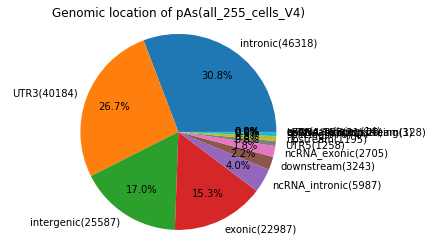

In [26]:
# total pas site: bed site (Not use，anno2/ mv to dustbin/ )
fname=baseDir+"anno/anno.stat"
drawPieFromSort_uniq(fname, keyword)

arr1= [46318, 40184, 25587, 22987, 5987, 3243, 2705, 1258, 1195, 976, 128, 21, 20, 14, 3]
arr2= ['intronic', 'UTR3', 'intergenic', 'exonic', 'ncRNA_intronic', 'downstream', 'ncRNA_exonic', 'UTR5', 'upstream', 'splicing', 'upstream;downstream', 'UTR5;UTR3', 'ncRNA_splicing', 'exonic;splicing', 'ncRNA_exonic;splicing']
arr3= ['intronic(46318)', 'UTR3(40184)', 'intergenic(25587)', 'exonic(22987)', 'ncRNA_intronic(5987)', 'downstream(3243)', 'ncRNA_exonic(2705)', 'UTR5(1258)', 'upstream(1195)', 'splicing(976)', 'upstream;downstream(128)', 'UTR5;UTR3(21)', 'ncRNA_splicing(20)', 'exonic;splicing(14)', 'ncRNA_exonic;splicing(3)']
pct= [0.308, 0.267, 0.17, 0.153, 0.04, 0.022, 0.018, 0.008, 0.008, 0.006, 0.001, 0.0, 0.0, 0.0, 0.0]


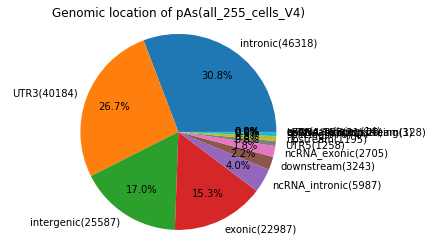

In [27]:
#Total pas site: bed pos +1
fname=baseDir+"anno/anno.stat"
drawPieFromSort_uniq(fname, keyword)